# Ex. 4 - Neural Networks

The last set of algorithms that we will discuss in this series is **Neural Networks**. Despite the fact that these algorithms were named **Artificial Neural Networks (ANN)** after a similarity with the neuronal structure of the brain cortex, the common aspects between the biological and artificial networks of neuron is pretty limited. 

From a mathematical perspective, neural networks are **non-parametric functions** designed to be efficiently optimized through gradient descent under some hypotheses that we will discuss in the following. In this sense, neural network can approximate (almost) whatever function.

The task that the trained neural network will perform and the quality of its performance depend on the training procedure and on the quality of the description of the function that we require the neural network to approximate. 

Often the function that the neural network has to approximate is not known in an explicit formulation. In fact, if we had a mathematical formula to describe the relation between the input and the output of the neural network, we could simply use that formula. Instead, we often have a set of "evaluations" of that function in a form of a table: `input -> output`. We must therefore design a training procedure that optimize the neural network to effectively fit the whatever mathematical relation between input and output. 

As for other fits, we can use the maximum likelihood principle to design the optimization, or in other words to define the quantity that we iteratively minimize named **loss function**.

Conceptually, this is **exactly** what we already discussed for the **Logistic Regression**, but instead of optimizing the coefficients of a straight line (or more properly the coefficients of a linear combination of the input features) we will first transform the input features into a **representation** that is optimial to perform a logistic regression and then we apply the logistic regression to that optimzal representation to obtain an optimal test-statistic.

Let's see it with some formulas, starting with a reminder of the logistic regression. Let's name the **multivariate** input sample $\{\mathbf{x}_i\}_i$ and label signal and background events with $\{y_i\}_i$ where $y_i = 1$ if the $i$-th entry belongs to the signal category and $y_i = 0$ otherwise. 
The we define the negative log-likelihood of a prediction of that label $\hat y_i$ as 
$$-\log\mathcal L = - \sum_i \Big( y_i \log (\hat y_i) + (1 - y_i)\log (1 - \hat y_i) \Big )$$
(refer to the notebook Ex. 2 for the discussion of this definition, also indicated as *Bernoulli cross-entropy*).
We will optimize the prediction $y_i$ to minimize this quantity, in particular, in the case of the Logistic Regression we will have 
$$ y_i (x_i; \mathbf{w}, b) = \sigma ( b + \sum_j w^{(j)} x_i^{(j)}) = \sigma ( b + \mathbf w^{\mathrm T} \mathbf x) $$
where $\sigma(x)$ is the sigmoid function. The coefficient of the linear combination of the inputs, $b$ and $\mathbf x$, are obtained minimizing the negative log-likelihood:

$$\boxed { b, \mathbf{w} = \mathop{\mathrm{argmin}}_{b, \mathbf{w}} \left\{  - \sum_i \Big( y_i \log (\sigma ( b + \mathbf w^{\mathrm T} \mathbf x) ) + (1 - y_i)\log (1 -  \sigma ( b + \mathbf w^{\mathrm T} \mathbf x) ) \Big )\right\}} $$

As mentioned above, the idea of using neural networks is to apply this minimization principle not to the input variables $\mathbf{x}$ but to some trasformation of the latter. 
$$\mathbf{x}^{(1)} = \mathit{transf}(\mathbf{x})$$
and hence 
$$\boxed { b, \mathbf{w}, \mathit{transf} = \mathop{\mathrm{argmin}}_{b, \mathbf{w}, \mathit{transf}} \left\{  - \sum_i \Big( y_i \log (\sigma ( b + \mathbf w^{\mathrm T} \mathbf x^{(1)}) ) + (1 - y_i)\log (1 -  \sigma ( b + \mathbf w^{\mathrm T} \mathbf x^{(1)}) ) \Big )\right\}} $$

The simplest transformation would be a linear transformation
$$\mathbf x^{(1)} = \mathbb{A}\mathbf{x} + a$$
where $\mathbb A$ is a matrix of weights and $a$ is a vector of bias playing the same role as $b$ for the logistic regression. 

So if we compute $\hat y$ we get 
$$\hat y = \sigma \left ( b + \mathbf w^\mathrm T \mathbb A \mathbf x + \mathbf w^\mathrm T a\right) = \sigma \left ( \mathbb C \mathbf x + c \right ) $$
where $\mathbb C = \mathbf w^\mathrm T \mathbb A$ and $c = b + \mathbf w^\mathrm T$.

This is, again, a linear prediction, identical to the logistic regression!
We need something more than a linear transformation for the variables, but without complicating the expression and **most importantly, the computation of the derivatives** (remember we want to do numerical optimization of these quantitites!).

We break the linearity of the function by introducing a scalar (easy to compute the gradients) non linear function with a analytical definition of the derivative (we don't need to actually compute the gradient). 
This function is named **activation function** and can be whatever function with the properties of:
 * being scalar (or in machine-learning jargon, element-wise); 
 * having trivial derivative almost everywhere;
 * being non-linear. 


The most common activation functions are shown below.


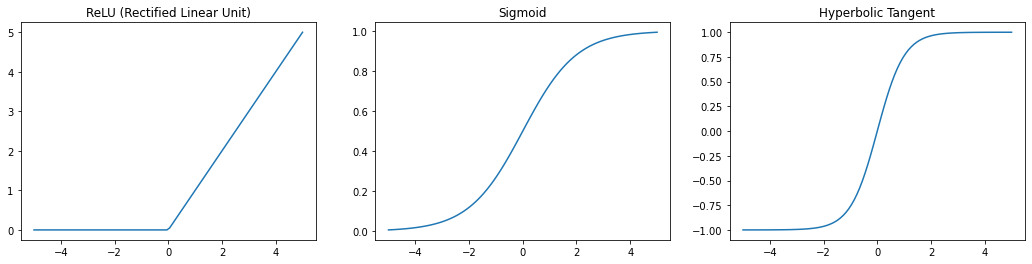

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

x = np.linspace (-5,5,100)

plt.figure (figsize = (18, 4))

plt.subplot (131)
plt.plot (x, np.maximum(0,x))
plt.title ("ReLU (Rectified Linear Unit)")
plt.subplot (132)
plt.plot (x, 1./(1. + np.exp(-x)))
plt.title ("Sigmoid")
plt.subplot (133)
plt.plot (x, np.tanh(x))
plt.title ("Hyperbolic Tangent")
plt.show()


To conclude, to use a neural network for classification means optimizing the negative log-likelihood function
$$\boxed { b, \mathbf{w}, \mathbb A, \mathbf a = \mathop{\mathrm{argmin}}_{b, \mathbf{w}, \mathbb{A}, \mathbf a} \left\{  - \sum_i \Big( y_i \log ( \hat y_i ) + (1 - y_i)\log (1 - \hat y_i ) \Big )\right\}} \quad \mathrm {where} \quad 
\hat y_i = \sigma ( b + f(\mathbb A \mathbf x + \mathbf a) ) $$
where $f(x)$ represents a generic activation function.

Clearly the "layer" of the neural network can be stacked together (you may apply this to a representation obtained from data through a non-linear transformation, instead of the data directly). And doing this you can increase arbitrarely the complexity of the neural network.

## A word on the software
To take the maximum out of neural networks, one should use software packages with the ability of computing the gradients of the expression analitically. This allows to perform the minimization with an extraordiary limited number of evaluation of the function. 

To compute the derivatives of these complicated expressions is not as difficult as it may seems, since the expression are obtained through function composition which allow to compute the derivative by taking the product of the derivatives of the various terms. Nonetheless, this procedure has a strict requirement: the whole function has to be known in advance, before trying to compute the derivatives. 
In other words, you cannot simply write the code in a sequential program and when you get the result ask to python to compute the derivative around that result, because the global formula is lost. 

To keep track of the formula you need a software package that allows to describe a **computational graph** and to evaluate it once it is "*compiled*". 
In this way, it is possible to explore the computational graph to compute the gradients with respect to the variables you want to determine through minimization. 

Packages that can be used to determine computational graphs are:
 * *sympy*: powerful for scalar expression, not as good when it comes to vectors and matrices, needed for neural networks
 * *theano*: (obsolete) allows to compile python code resolving numerical instabilities before using it for minimization
 * *torch*: a modern framework for deep learning, with effective C++ libraries and python API
 * *tensorflow*: another moder framework for deep learning, very effective in python, with great abilities to export the trained models.

We will use *tensorflow*. The logic would be the same in PyTorch, though the syntax is less similar to *numpy* and therefore slightly less intuitive for numpy programmers. 

## And... let's start!
We download the code and setup the environment as we did in the previous notebooks.

In [ ]:
!pip install uproot 
files = {
    "WWTo2L2Nu1.root": "1oix_LaKYaPgMPdOcG8O6_qwq3a0CD1EO",
    "GGToHToWWTo2L2Nu1.root": "1lD3JG12bP21oN94bEmDOZuLQBd4y2Dwk",
    "WWTo2L2Nu2.root":"1KTlRb66tSPajEpJJoLqmqisBQW-Pakjk",
    "GGToHToWWTo2L2Nu2.root": "1X72-i7qrYqQyA02jCESFFlSq33__x_tq"}
!rm -f *.root
import os 
for kv in files.items():
  if not os.path.exists(kv[0]):
    a = os.system ( "wget -O %s --no-check-certificate 'https://docs.google.com/uc?export=download&id=%s'" % kv )
    if a:
      print (a)
      print ('https://docs.google.com/uc?export=download&id=%s' % kv[1])
      raise IOError ( "Could not download %s (%s)" % kv ) 

import uproot, pandas as pd
signal      = uproot.open ( "GGToHToWWTo2L2Nu2.root" )['latino'].arrays(library='pd')
background  = uproot.open ( "WWTo2L2Nu2.root" )['latino'].arrays(library='pd')
signal['label'] = 1; background['label'] = 0
dataset = pd.concat ((signal,background))

signal_test     = uproot.open ( "GGToHToWWTo2L2Nu1.root" )['latino'].arrays(library='pd')
background_test = uproot.open ( "WWTo2L2Nu1.root" )['latino'].arrays(library='pd')
signal_test['label'] = 1; background_test['label'] = 0
dataset_test = pd.concat ((signal_test,background_test))

isSignal = (dataset['label'] == 1)
isSignal_test = (dataset_test['label'] == 1)


     |████████████████████████████████| 215kB 8.2MB/s 


We define the size of the images.

In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

We define the set of features we want to use as input of the neural networks. 
We keep the most powerful out, because we want to be convinced of the physics meaning of what we are doing. 

A variable that allows to distinguish signal and background *by eye* is useful, for example, to count the number of signal events that we managed to select, for example through a fit in one single variable.

For this to make sense, it would be better if there was little correlation between this variable and the multivariate discriminat, but we will discuss this later in this notebook.


In [ ]:
all_vars = ['metPfType1Phi', 'metPfType1', 'drll', 'njet', 'mTi', 'dphill',
       'dphillmet', 'ptll', 'dphilmet', 'mth'] ## All but mll

Ok, before launching ourselves in the description of a neural network, let's use TensorFlow to describe a problem we are already familiar with: the **logistic regression**.

This will allow us to introduce gently (well... as gently as possible given the time constraints) the concept of computing graph and 
automatic gradient computation.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange

## We define a python class inheriting from the tensorflow class Module that 
## allows to export the trained model to files, in case we want to reuse it 
## in different contexts with respect to the notebook where we trained it.
class LogisticRegression ( tf.Module ):
  ## This is the constructor of the module, it is the function that it is 
  ## called when we first instanciate the module in the computer memory.
  def __init__ (self, nEpochs, learning_rate = 0.005):
    ## At construction time, we define an optimization algorithm. This is 
    ## an evolution of the gradient descent, that is more stable and automatically 
    ## tunes the learning rate during the optimization procedure. 
    self.optimizer = tf.optimizers.Adam (learning_rate)

    ## We also define the number of iterations that we are willing to wait for 
    ## while optimizing the problem. The larger the better, but more time consuming.
    self.nEpochs = nEpochs
  
  ## We define a build function that is called the first time that we have 
  ## the whole information needed to build the neural network (number of input 
  ## feature, in this case).
  def build (self, n_input):
    ## The build function create the "Variable" objects: which are the tensors
    ## (in this case a matrix and a vector) that will be modified during the 
    ## optimization procedure. 
    self.w = tf.Variable ( np.random.normal ( 0, 1, (n_input,1) ), dtype=tf.float32 )
    self.b = tf.Variable ( 0., dtype=tf.float32 )
    ## We let the build function to return a list of weight tensors that 
    ## define the model. 
    return self.w, self.b

  ## We define a function to compute y_hat. This function is called whenever 
  ## we want to evaluate the logistic regression prediction: both during the 
  ## training and during the test.
  ## Note that this function is *PART OF THE COMPUTATIONAL GRAPH* and must 
  ## therefore be "decorated" with the keyword "tf.function". This tells 
  ## TensorFlow not to evaluate the probability when the function is 
  ## evaluated, but rather to use the function as a building block in the 
  ## construction of the computational graph, connecting the tensor X (whatever 
  ## it will be when running the graph) to a set of operations defined 
  ## within the function.
  @tf.function
  def predict_proba (self, X):
    ## Preprocess the input (see below for discussion on preprocessing.)
    ppX = (X - self.means)/self.sigmas

    ## Compute the prediction for the linear regression. To avoid errors 
    ## in the computation of the logarithm when its argument gets too close 
    ## to zero, we clip the value of the output of the sigmoid in the 
    ## range (1e-7, 1. - 1e-7) this avoids reaching 0 or 1 which would make 
    ## the cross-entropy formula to explode. 
    return tf.clip_by_value (
      tf.nn.sigmoid ( tf.matmul (ppX, self.w) + self.b ),
      1e-7, 1. - 1e-7
    )

  ## We define the single-step in the training procedure, corresponding to 
  ## one "jump" towards the minimum following the inverse direction of the 
  ## gradient. Once again, we instruct TensorFlow to treat this as a part 
  ## of the computing graph.
  @tf.function
  def _train (self, X, y):
    ## We ensure that the label are homogeneous with the other variables 
    ## so we cast them to 32-bit floating point representation 
    y_true = tf.cast (y, tf.float32)

    ## We start the registration of the gradients.
    with tf.GradientTape() as gt:
      ## In particular of the gradients with respect to the weights as defined 
      ## in the build function 
      gt.watch ( self.weights )

      ## We compute the prediction using pre predict_proba function defined 
      ## earlier 
      y_hat = self.predict_proba(X)

      ## The loss function is the negative log-likelihood discussed in the 
      ## introduction.
      loss = -tf.reduce_mean ( y_true * tf.math.log(y_hat) + (1. - y_true) * tf.math.log(1. - y_hat) )
      
      ## Finally we use the registration of the computing graph to compute 
      ## the gradients with respect to the model weights 
      gradients = gt.gradient ( loss, self.weights )

    ## And apply the computed gradients to the weights to walk the "step" towards
    ## the minimum.
    self.optimizer.apply_gradients ( zip(gradients, self.weights) )
    return loss
  
 
  ## We define the function to train (or fit) the logistic regression to 
  ## an input dataset. We take as input the dataset X and the label y.
  def fit (self, X, y):
    ## We obtain the weights of the model, i.e. the variables we want to
    ## determine with the minimization procedure, calling the `build` function.
    self.weights = self.build (X.shape[1])

    ## We compute the mean and the standard deviation of the input dataset 
    ## to allow preprocessing (see below). 
    self.means = np.mean (X, axis = 0)
    self.sigmas = np.std ( X, axis = 0)

    ## Then we iteratively call the _train function that performs one 
    ## step in the minimization. 
    ## We register the value of the negative log-likelihood at each 
    ## step to display the status of the optimization. 
    losses = []
    for iEpoch in trange (self.nEpochs):
      losses.append ( self._train (X,y) )
    
    ## And we plo1t the loss
    plt.plot (losses)
    plt.yscale('log')
    plt.xlabel ("Epoch"); plt.ylabel ("Loss function")
    plt.show()

Great! We have a Logistic Regression model defined using TensorFlow, and we are ready to train it on our Higgs dataset and see what happens.

100%|██████████| 2000/2000 [00:06<00:00, 320.94it/s]


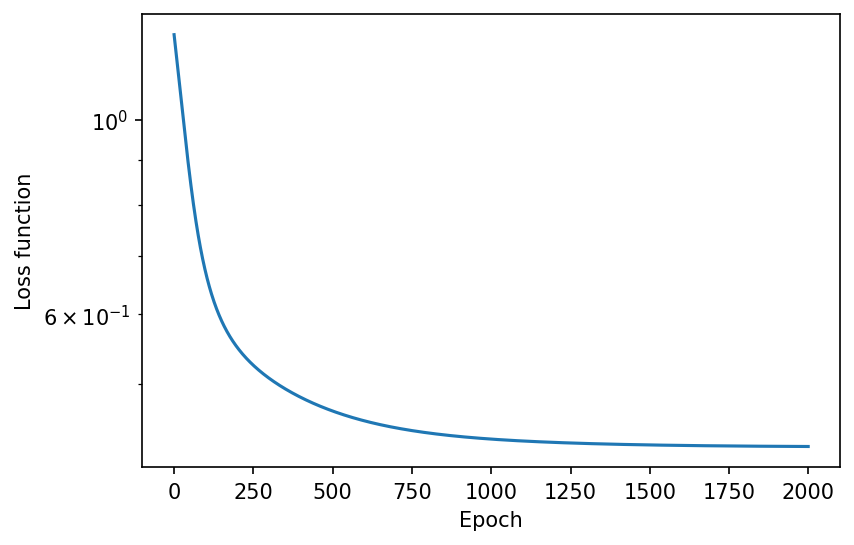

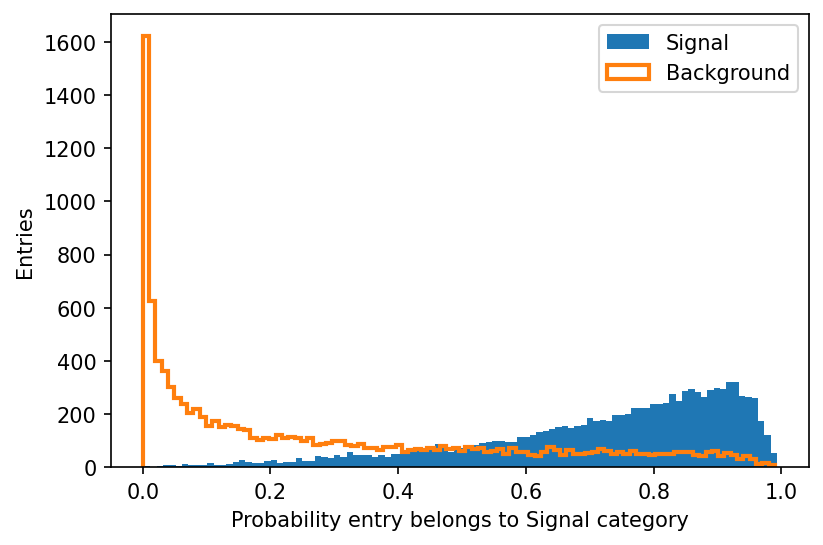

In [ ]:
## Instanciate the regressor that we have just defined 
lr = LogisticRegression(2000)

## Call its fit method passing the X and y variables 
lr.fit (dataset[all_vars].values, dataset[['label']].values)

## Evaluate the model to build the histogram of the test-statistic
y_lr = lr.predict_proba ( dataset[all_vars].values )

plt.hist ( y_lr.numpy().reshape(-1)[isSignal], bins = 100, label = 'Signal' )
plt.hist ( y_lr.numpy().reshape(-1)[~isSignal], histtype='step', linewidth=2, bins = 100, label = 'Background' )
plt.xlabel ("Probability entry belongs to Signal category"); plt.ylabel ("Entries")
plt.legend()
plt.show()

As we discussed for the decision trees, we can use an independent sample to ensure that the trained model correctly generalizes to samples not used during the training phase.

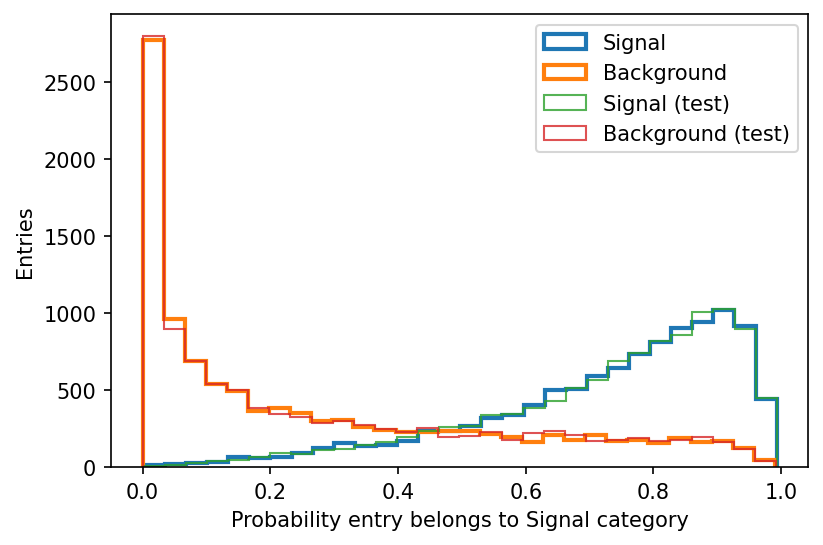

In [ ]:
y_lr      = lr.predict_proba ( dataset[all_vars].values )
y_lr_test = lr.predict_proba ( dataset_test[all_vars].values )

plt.hist ( y_lr.numpy().reshape(-1)[isSignal], histtype='step', linewidth=2, bins = 30, label = 'Signal' )
plt.hist ( y_lr.numpy().reshape(-1)[~isSignal], histtype='step', linewidth=2, bins = 30, label = 'Background' )
plt.hist ( y_lr_test.numpy().reshape(-1)[isSignal_test], histtype='step', bins = 30, label = 'Signal (test)', alpha = 0.8 )
plt.hist ( y_lr_test.numpy().reshape(-1)[~isSignal_test], histtype='step', bins = 30, label = 'Background (test)', alpha=0.8 )
plt.xlabel ("Probability entry belongs to Signal category"); plt.ylabel ("Entries")
plt.legend()
plt.show()

## On the Preprocessing

While discussing the module on the Logistic Regression, we postponed the discussion on the the so-called preprocessing. 

One of the most important hypothesis on which the the efficient optimizers used to train neural networks are developed on is that the features span all the same range. If this is not true (as it rarely it is when processing physics data) the minimization is more difficult, it may take a much large number of iterations or just never reach convergency.

A simple technique to ensure that the input variables match this requirement is to preprocess them, mapping the variables into some space with known range. 
The most common preprocessing techniques are:
 * [*StandardScaling*](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn-preprocessing-standardscaler): 
 $$\mathbf x_{\mathrm{preprocessed}} = \frac{\mathbf x - \mathbb E(\mathbf x)}{\sqrt {\mathbb E(\mathbf x^2) - \mathbb E (\mathbf x)^2}} $$
 * [*Min-max scaling*](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn-preprocessing-minmaxscaler):
 $$\mathbf x_{\mathrm{preprocessed}} = \frac{\mathbf x - \min \mathbf x}{\max \mathbf x - \min \mathbf x} $$
 * [*Quantile transform*](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html#sklearn-preprocessing-quantiletransformer):
$$\mathbf x_{\mathrm{preprocessed}} = F ( \mathbf{x} )\quad \mathrm{with} \quad F(x) = \int_{- \infty}^{x} f(t) \mathrm d t $$
where $f(x)$ is the marginalized distribution of each single feature.

Quantile transformer a non linear transformation that is not trivial to invert, and should be used only for special problems where the tails of the distributions are too difficult to treat with other analytical formulas. 



## From LogisticRegression to NeuralNetwork

Now we have all the building block to construct a neural network.
We start from the `LogisticRegression` class and we only replace the functions that are related to the construction of the model (`build`) and its evaluation 
(`predict_proba`).

100%|██████████| 50000/50000 [01:24<00:00, 592.29it/s]


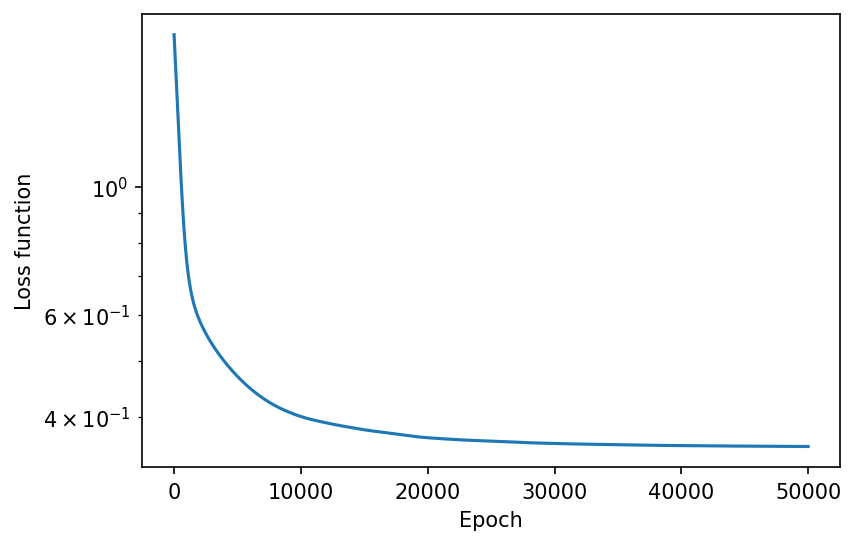

In [ ]:
class SimpleNeuralNetwork ( LogisticRegression ):

  def build (self, n_input):
    N_NODES = 32

    ## The shape of the matrix A (named layer1_w here) is n_inputs x N_NODES.
    ## N_NODES is the number of features of the representation on which we will
    ## perform the logistic regression, and it is often indicated as 
    ## number of neurons.
    self.layer1_w = tf.Variable ( np.random.normal (0,1, (n_input, N_NODES)), dtype=tf.float32 )
    self.layer1_b = tf.Variable ( np.zeros  (N_NODES), dtype=tf.float32 )
    self.activation1 = tf.math.tanh

    ## Do you want to add another layer?
    #self.layer2_w = tf.Variable ( np.random.normal (0,1, (N_NODES, N_NODES)), dtype=tf.float32 )
    #self.layer2_b = tf.Variable ( np.zeros  (N_NODES), dtype=tf.float32 )
    #self.activation2 = tf.math.tanh

    self.w = tf.Variable ( np.random.normal ( 0, 1, (N_NODES,1) ), dtype=tf.float32 )
    self.b = tf.Variable ( 0., dtype=tf.float32 )

    return self.w, self.b, self.layer1_w, self.layer1_b

  @tf.function
  def predict_proba (self, X):
    ppX = (X - self.means)/self.sigmas

    ## One or two layers? 
    ppX2 = self.activation1 ( tf.matmul (ppX, self.layer1_w) + self.layer1_b )
    #ppX3 = self.activation2 ( tf.matmul (ppX2, self.layer2_w) + self.layer2_b )

    return tf.clip_by_value (
      tf.nn.sigmoid ( tf.matmul (ppX2, self.w) + self.b ),
      1e-7, 1. - 1e-7
    )

nn = SimpleNeuralNetwork(50000, 1e-4)
nn.fit (dataset[all_vars].values, dataset[['label']].values)


Then, as we did earlier, we compare the result obtained with the neural network on the training and tes dataset, to check for possible overtraining.

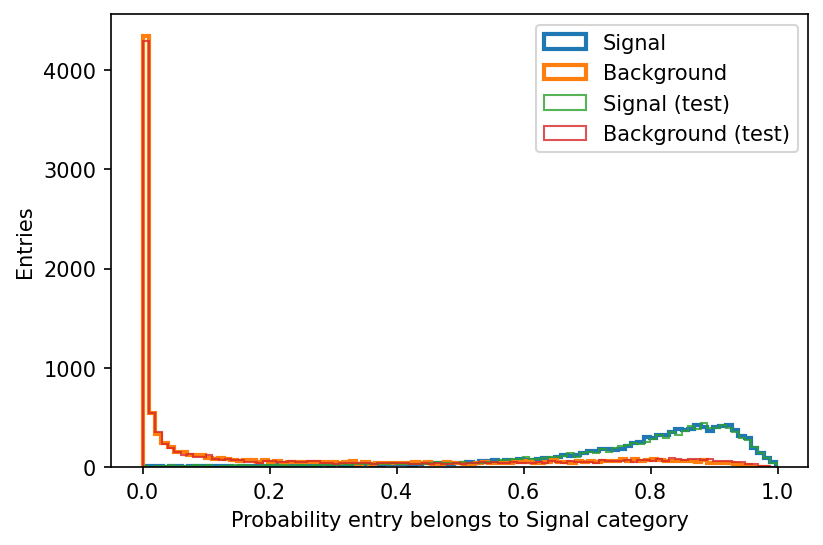

In [ ]:
y_nn      = nn.predict_proba ( dataset[all_vars].values )
y_nn_test = nn.predict_proba ( dataset_test[all_vars].values )

plt.hist ( y_nn.numpy().reshape(-1)[isSignal], histtype='step', linewidth=2, bins = 100, label = 'Signal' )
plt.hist ( y_nn.numpy().reshape(-1)[~isSignal], histtype='step', linewidth=2, bins = 100, label = 'Background' )
plt.hist ( y_nn_test.numpy().reshape(-1)[isSignal_test], histtype='step', bins = 100, label = 'Signal (test)', alpha = 0.8 )
plt.hist ( y_nn_test.numpy().reshape(-1)[~isSignal_test], histtype='step', bins = 100, label = 'Background (test)', alpha=0.8 )
plt.xlabel ("Probability entry belongs to Signal category"); plt.ylabel ("Entries")
plt.legend()
plt.show()

Note that the fact that we used tensorflow to compute the prediction, does not imply that we cannot use scikit learn to characterize the model.

For example we can compare the area under the roc curve and discover that while it *seems* we are doing better than logistic regression on the training sample, the improvement is much less pronounced on the test sample, probably because we are approaching an over-trained configuration of the network.

In [ ]:
from sklearn.metrics import roc_auc_score

print ("Logistic Regression:        %2.2f %%" % (1e2 * roc_auc_score(dataset[['label']], y_lr)))
print ("Neural Network:             %2.2f %%" % (1e2 * roc_auc_score(dataset[['label']], y_nn)))
print ("Logistic Regression (test): %2.2f %%" % (1e2 * roc_auc_score(dataset_test[['label']], y_lr_test)))
print ("Neural Network (test):      %2.2f %%" % (1e2 * roc_auc_score(dataset_test[['label']], y_nn_test)))

Logistic Regression:        87.89 %
Neural Network:             91.01 %
Logistic Regression (test): 87.72 %
Neural Network (test):      88.76 %


Similarly, we compute and superpose the ROC curve for the logistic regressio and for the neural network.

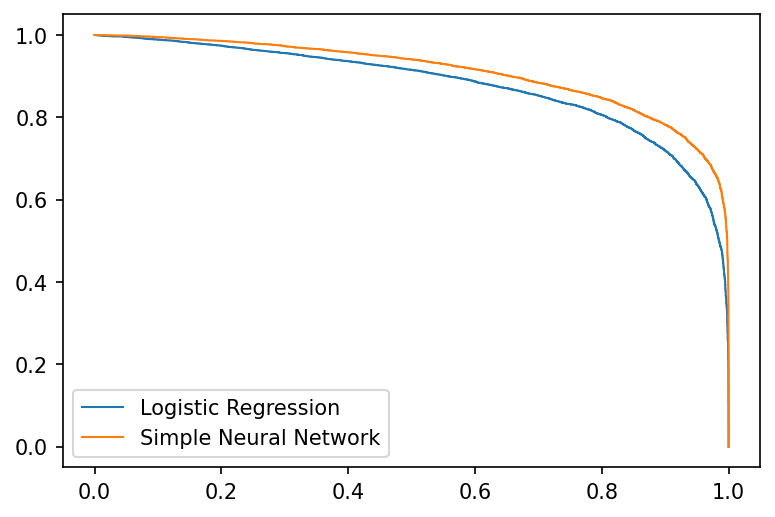

In [ ]:
from sklearn.metrics import roc_curve

y_lr = lr.predict_proba ( dataset[all_vars].values )
bkgRej, sigRej, _ = roc_curve (dataset['label'].values, y_lr.numpy())
plt.plot ( sigRej, 1.-bkgRej , label = 'Logistic Regression', linewidth=1 )

y_nn = nn.predict_proba ( dataset[all_vars].values )
bkgRej, sigRej, _ = roc_curve (dataset['label'].values, y_nn.numpy())
plt.plot ( sigRej, 1.-bkgRej , label = 'Simple Neural Network', linewidth=1 )
plt.legend()
plt.show()

# Using Keras

[Keras](http://keras.io) is a python library that enclose all the technicalities discussed above on the definition and training of the neural networks. 
It uses tensorflow as a backend to compute the gradients and perform the optimization and it can be seen as a set of **high-level APIs** to tensorflow.
For this reason it is also shipped together with tensorflow.

Keras is a powerful tool to define neural network, and can be used effectively 
to train them when the problem is sufficiently simple. 
The excellent integration between keras and tensorflow allows to define the models with keras and train them with tensorflow, which is often a good idea to obtain the most out of the two: the simplicity and optimization of the keras 
models and the flexibility in the training and in the definition of the loss functions of TensorFlow. 
We will see an example of combined application of the two libraries later, but for now let's stick to pure Keras.

In the code snippet below we train a deep neural network with two layers of 128 neurons each on our Higgs dataset.



In [ ]:
## We import the building blocks of the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## And construct the model appending the number of layers we wish to 
model = Sequential ([
         Dense ( 128, activation = 'tanh' ), 
         Dense ( 128, activation = 'tanh' ), 
         Dense ( 1, activation = 'sigmoid'  )
  ])

## We compile the model defining the optimizer and the loss-function to use 
model.compile(optimizer='adam', loss='binary_crossentropy')

## We load the dataset 
X, y = dataset[all_vars].values, dataset[['label']].values
X_test, y_test = dataset_test[all_vars].values, dataset_test[['label']].values

## Fit the model to the dataset to minimize the binary cross-entropy
model.fit (X,y)

683/683 [==============================] - 2s 2ms/step - loss: 0.5637


A model with two layers of 128 nodes each is probably a little bit too large for this simple problem (it has more than 10 * 128 + 128 * 128 + 128 free parameters! Remember the von Neumann's [*Elephant Rule*](https://stevengoddard.wordpress.com/2011/04/18/with-four-parameters-i-can-fit-an-elephant-and-with-five-i-can-make-him-wiggle-his-trunk/))

To control over-training we can, at each step, compare the loss function computed on the training sample and on the test sample.

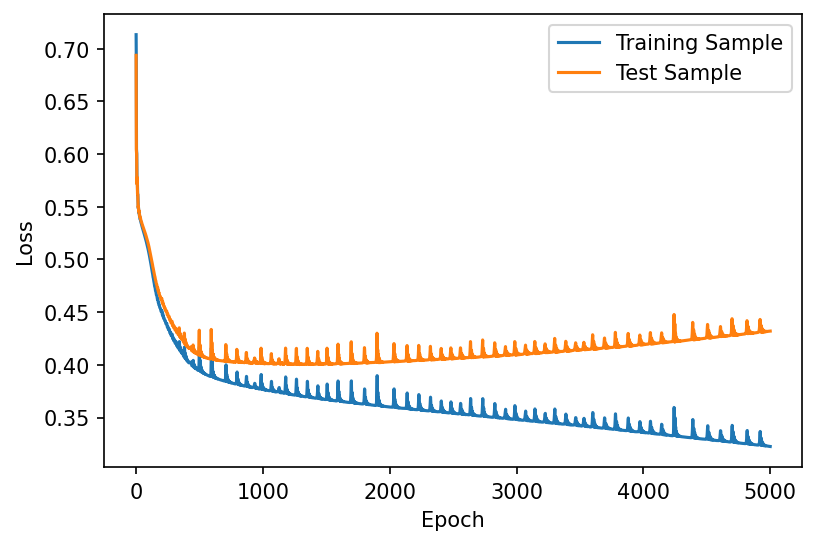

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential ([
         Dense ( 128, activation = 'tanh' ), 
         Dense ( 128, activation = 'tanh' ), 
         Dense ( 1, activation = 'sigmoid'  )
  ])

model.compile(optimizer='adam', loss='binary_crossentropy')

losses_train = []
losses_test  = []

X, y = dataset[all_vars].values, dataset[['label']].values
X_test, y_test = dataset_test[all_vars].values, dataset_test[['label']].values
for iEpoch in range(5000):
  losses_train . append ( model.train_on_batch ( X, y ) )
  losses_test . append ( model.test_on_batch ( X_test, y_test ) )

plt.plot ( losses_train, label = 'Training Sample' )
plt.plot ( losses_test, label = 'Test Sample' )
plt.xlabel ("Epoch"); plt.ylabel ("Loss")
plt.legend()
plt.show()



We observe indeed that there is a slight overtraining after 200-300 epochs. We may stop the training there (this is called *early stopping*). 

If we study the histogram of the test-statistics we see what happened: the tails of the histogram are very different between the training and the test sample. These tails are due to signal events that are very similar to background and can be identified by the neural network, but the way they are 
identified cannot be easily transferred to the test sample.

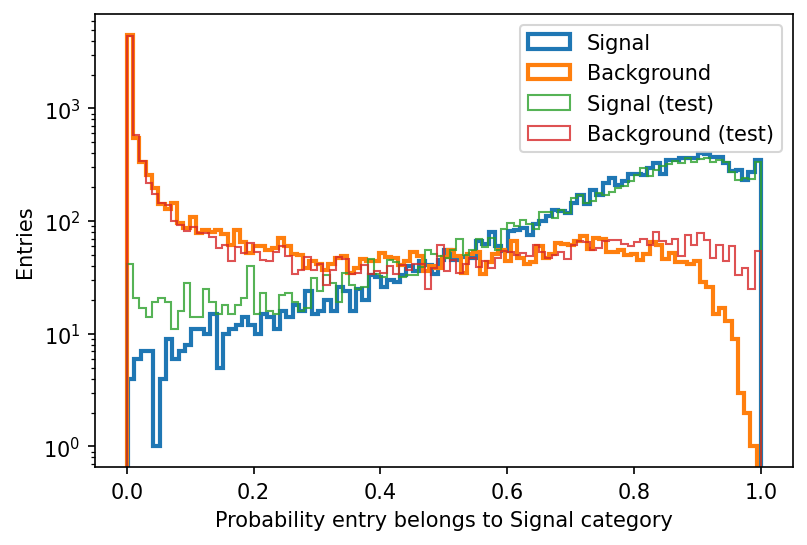

In [ ]:
y_nn      = model.predict ( dataset[all_vars].values )
y_nn_test = model.predict ( dataset_test[all_vars].values )

plt.hist ( y_nn.reshape(-1)[isSignal], histtype='step', linewidth=2, bins = 100, label = 'Signal' )
plt.hist ( y_nn.reshape(-1)[~isSignal], histtype='step', linewidth=2, bins = 100, label = 'Background' )
plt.hist ( y_nn_test.reshape(-1)[isSignal_test], histtype='step', bins = 100, label = 'Signal (test)', alpha = 0.8 )
plt.hist ( y_nn_test.reshape(-1)[~isSignal_test], histtype='step', bins = 100, label = 'Background (test)', alpha=0.8 )
plt.xlabel ("Probability entry belongs to Signal category"); plt.ylabel ("Entries")
plt.legend()
plt.yscale ('log')
plt.show()

And indeed... we get different a more different score on the test and training samples.

In [ ]:
print ("Logistic Regression:        %2.2f %%" % (1e2 * roc_auc_score(dataset[['label']], y_lr)))
print ("Neural Network:             %2.2f %%" % (1e2 * roc_auc_score(dataset[['label']], y_nn)))
print ("Logistic Regression (test): %2.2f %%" % (1e2 * roc_auc_score(dataset_test[['label']], y_lr_test)))
print ("Neural Network (test):      %2.2f %%" % (1e2 * roc_auc_score(dataset_test[['label']], y_nn_test)))

Logistic Regression:        87.89 %
Neural Network:             92.92 %
Logistic Regression (test): 87.72 %
Neural Network (test):      87.80 %


But wait, what??? 

More than 10 thousand parameters and the network is not able to do better than a simple logistic regression? It should overtrain at the level of memorize the position of each single data entry if necessary... why does this fails?

### Exercise 4.1
Try repeating the exercise without forgetting the preprocessing of the dataset.

In [ ]:
## 1. Import the Sequential model and the Dense layer from keras 

## 2. Build your Sequential model defining the structure of the neural network

## 3. Compile the model (model.compile)

## 4. Obtain from the dataset the X variable, the y labels for:
##    - the training dataset 
##    - the test dataset 

## 5. Preprocess the variables:
##    - compute the mean and standard deviation for each variable (axis = 0)
##    - subtract the mean and divide for the standard deviation, 
##      storing the result in a new variable, say ppX
##    - repeat the procedure for the test dataset

## 6. Train the model keeping track of the loss function on both datasets
##    - create two empty lists for the losses on the train and test samples. 
##    - make a loop on a large number of epochs (e.g. 5000)
##    - for each epoch 
##      . train the model with "train_on_batch" and append the returned loss 
##        function to one of the lists you created above
##      . compute the loss on "test_on_batch" and store it in the other list

## 7. Plot the two losses 
# plt.plot ( losses_train, label = 'Training Sample' )
# plt.plot ( losses_test, label = 'Test Sample' )
# plt.xlabel ("Epoch"); plt.ylabel ("Loss")
# plt.legend()
# plt.show()



## Systems of neural networks

You may wonder why people should prefer neural networks over Boosted Decision Trees. BDT are much easier to use, they are faster to train and perform better against over-training. 

The main reason of the explosion in the usage of neural networks is that they can be processed more efficiently on huge datasets that cannot fit the RAM memory of a single computing node, which cannot be done with boosted decision trees.
But the reason why the are so interesting for particle physics (where we are far from reaching the saturation of the RAM memory thanks a different data type) is that neural network can be combined in systems of neural networks and trained together to solve problems for which the loss function cannot be easily 
determined analytically. 

We will try now to discuss one of these applications, note that this is considered an advanced topic in machine learning and may serve to deepen your understanding of the capabilities of the framework, more than as a practical example of a problem solved using machine learning. 

We get back to the definition of the features used as input variables for our neural network. You remember that we removed from the set of variables the most discriminant one because we want to "*read*" it without it being affected by neural network processing. But is this true? 

To cross-check the independence of the neural network on the input feature $m_{\ell\ell}$ we plot the distribution of the dataset with respect to the variable
$m_{\ell\ell}$ for different values of the threshold on the test-statistic obtained from the neural network.

If they were independent, we would see that the distribution of $m_{\ell\ell}$ 
is constant and independent of the cut on the neural network.

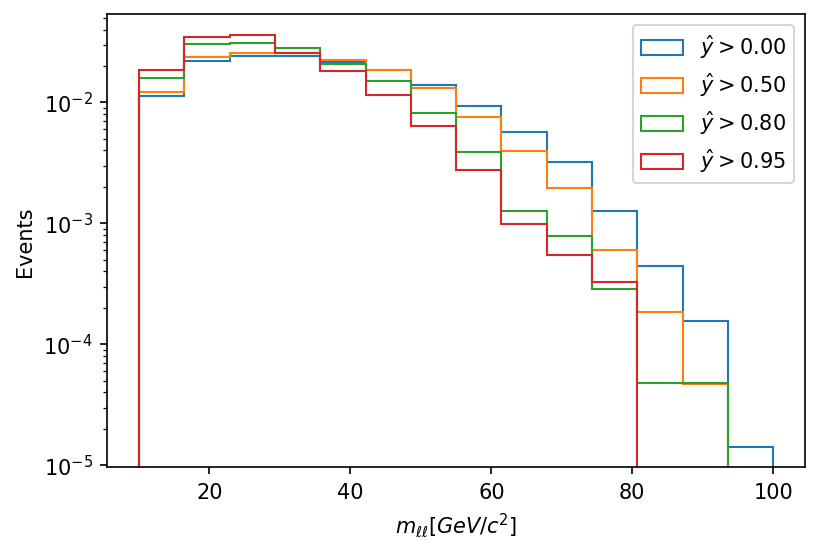

In [ ]:
axis = np.linspace (10,100,   15 )
for threshold in [0,0.5,0.8, 0.95]:
  plt.hist(signal[['mll']].values[y_nn[isSignal] > threshold], bins = axis, label = '$\hat y > %.2f$' % threshold, histtype='step', density=True )

plt.xlabel ("$m_{\ell\ell} [GeV/c^{2}]$")
plt.ylabel ("Events")
plt.yscale ("log")
plt.legend()
plt.show()

Clearly they are not independent. The neural network relies on variables that are statistically correlated to $m_{\ell\ell}$ so that even if it is not using 
its value directly as an input, the response is correlated to $m_{\ell\ell}$ and rejects more events at large mass where the background contamination is more important. 

Can we prevent this? Can we train the neural network explicitely not to rely 
on the variable $m_{\ell\ell}$? We not only don't want it take this varible as an input, but we want the output of the neural network not to be aware of the value of the invariant mass of the two charged leptons. 

What we can try to do is to remove the information on $m_{\ell\ell}$ from the representation. 

In formulas, we know that we have a neural network $N_1$ that produces the 
*representation* and a *logistic regression* $N_3$ that converts that representation in a prediction $\hat y$.
And we know that we will train it using a Binary Cross-Entropy (BCE). So let's write syntetically
$$
(\mathrm{loss}) = \mathrm{BCE} (N_3 (N_1 ( \mathbf x )))
$$

To this loss we wish to add a penalty if $N_1$ outputs something that is related to $m_{\ell\ell}$. So we train another neural network $N_2(\mathbf x)$
to try guessing the value of $m_{\ell\ell}$ from the representation.
This is a regression, so the loss function can be a simple RMS error ($\sqrt{\sum(y - y_\mathrm{true})^2}$), 
$$
(\mathrm{loss}_2) = \mathrm{RMS} ( N_2(N_1, \mathbf x ), m_{\ell\ell} )
$$

Then we want the neural network $N_1$ to be trained in a way that makes it more difficult for $N_2$ to minimize its loss, or in other words, $N_2$ must "maximize" the loss $(\mathrm(loss)_2)$. 

So in summary, the optimization algorithm will optimize $N_1$, $N_2$, and $N_3$ separately

$$
N_3 \rightarrow -\nabla_{N3}\mathcal L_{N3} = -\nabla_{N3}\mathrm{BCE} (N_3 (N_1 ( \mathbf x )))\\[12pt]
N_2 \rightarrow -\nabla_{N2}\mathcal L_{N2} = -\mathrm{RMS} ( N_2(N_1, \mathbf x ), m_{\ell\ell})\\[12pt]
N_1 \rightarrow -\nabla_{N1}\mathcal L_{N2} + \alpha \nabla_{N1} \mathcal L_{N2} 
$$

$\alpha$ is a hyperparameter that balance between the need of removing information on $m_{\ell\ell}$ from the representation ($\alpha$ large) and the 
need for maximal separation between signal and background ($\alpha$ small).

Preprocessing or not, the training of this neural network requires a lot of epochs. To make it faster make sure you are running on a GPU by selecting the correct runtime from the Colab backend. 
Note that tensorflow, independently of colab, automatically executes the instructions on GPU if one is avaiable on the current system.

> You may want to compare the time needed to perform the training with CPU and GPU (and why not TPU) backends

100%|██████████| 20000/20000 [00:46<00:00, 425.78it/s]


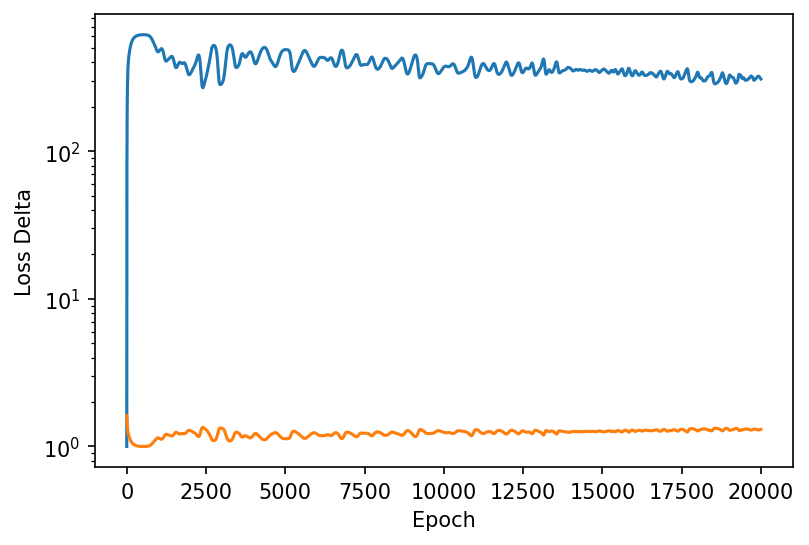

In [ ]:
class NeuralNetworkWithDomainAdaptation ( tf.Module ):
  def __init__ (self, nEpochs, learning_rate = 0.005):
    self.optimizer  = tf.optimizers.Adam (learning_rate)
    self.optimizer2 = tf.optimizers.Adam (learning_rate*10.)
    self.nEpochs = nEpochs
  
  def build (self, n_input):
    N_NODES = 32
    self.model1 = Sequential ([
        Dense (N_NODES, activation = 'tanh') ,
        #Dense (N_NODES, activation = 'tanh')
      ])
    
    
    self.model2 = Sequential ([
        Dense (N_NODES, activation = 'tanh'),
        Dense (1, activation = 'sigmoid')
    ])

    self.model3 = Sequential ([
        Dense (1, activation = 'sigmoid')
    ])

    self.model1.build ((None, n_input,))
    self.model2.build ((None, N_NODES,))
    self.model3.build ((None, N_NODES,))

    return self.model1.weights + self.model3.weights


  
  @tf.function
  def representation (self, X):
    ppX = (X - self.means)/self.sigmas
    return  self.model1 (ppX) 

  def fit (self, X, y, X_ctrl, show_loss = False):
    self.weights = self.build (X.shape[1])
    losses = []
    losses_ctrl = []
    self.means = np.mean ( X, axis = 0)
    self.sigmas = np.std ( X, axis = 0)
    self.means_ctrl = np.mean (X_ctrl, axis = 0)
    self.sigmas_ctrl = np.std ( X_ctrl, axis = 0)

    ppX_ctrl = (X_ctrl - self.means_ctrl) / self.sigmas_ctrl

    for iEpoch in trange (self.nEpochs):
      l, l_ctrl = self._train (X, y, X_ctrl)
      losses.append ( l )
      losses_ctrl.append ( l_ctrl )
    
    losses = np.array(losses)
    losses_ctrl = np.array(losses_ctrl)
    plt.plot (losses - losses.min() + 1 )
    plt.plot (losses_ctrl - losses_ctrl.min() + 1 )
    plt.yscale('log')
    plt.xlabel ("Epoch"); plt.ylabel ("Loss Delta")
    plt.show()

  @tf.function
  def predict_proba (self, X):
    ppX2 = self.representation (X)
    return tf.clip_by_value ( self.model3 (ppX2), 1e-7, 1. - 1e-7 )


  @tf.function
  def _train (self, X, y, X_ctrl, alpha = 1000):
    y_true = tf.cast (y, tf.float32)
    ppX_ctrl = (X_ctrl - self.means_ctrl ) / self.sigmas_ctrl 
    with tf.GradientTape() as gt, tf.GradientTape() as gt_ctrl:
      gt.watch ( self.weights )
      y_hat = self.predict_proba  (X)
      ppX2  = self.representation (X)
      loss_ctrl = tf.reduce_mean ( tf.square ( ppX_ctrl - self.model2(ppX2) ) ) 
      loss = -tf.reduce_mean ( y_true * tf.math.log(y_hat) + (1. - y_true) * tf.math.log(1. - y_hat) ) - alpha*loss_ctrl

      gradients = gt.gradient ( loss, self.weights )
      gradients_ctrl = gt_ctrl.gradient ( loss_ctrl, self.model2.weights )

    self.optimizer .apply_gradients ( zip(gradients, self.weights) )
    self.optimizer2.apply_gradients ( zip(gradients_ctrl, self.model2.weights ) )
    return loss, loss_ctrl


nn = NeuralNetworkWithDomainAdaptation(20000, 1e-4)
nn.fit (dataset[all_vars].values, dataset[['label']].values, dataset[['mll']].values)


This traning scheme is said an adversarial training scheme because there are two players (representing two opposite needs) that are trained towards some equilibrium while using the solution found by one of the players to inform the training of the other.

Clearly, we lost a lot of sepration power doing this operation because we are imposing the neural network to ignore part of the correlations between the variables.

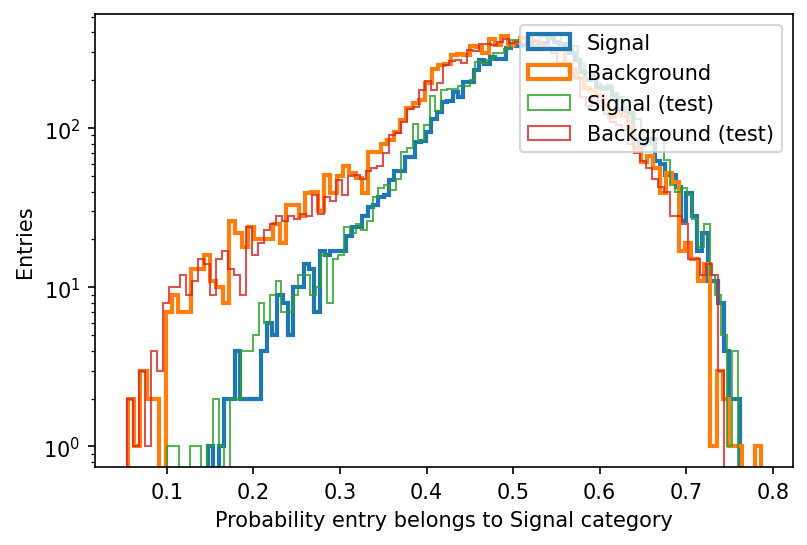

In [ ]:
y_nn      = nn.predict_proba ( dataset[all_vars].values ).numpy()
y_nn_test = nn.predict_proba ( dataset_test[all_vars].values ).numpy()

plt.hist ( y_nn.reshape(-1)[isSignal], histtype='step', linewidth=2, bins = 100, label = 'Signal' )
plt.hist ( y_nn.reshape(-1)[~isSignal], histtype='step', linewidth=2, bins = 100, label = 'Background' )
plt.hist ( y_nn_test.reshape(-1)[isSignal_test], histtype='step', bins = 100, label = 'Signal (test)', alpha = 0.8 )
plt.hist ( y_nn_test.reshape(-1)[~isSignal_test], histtype='step', bins = 100, label = 'Background (test)', alpha=0.8 )
plt.xlabel ("Probability entry belongs to Signal category"); plt.ylabel ("Entries")
plt.legend()
plt.yscale ('log')
plt.show()

but we drastically reduced the effect of the cut on the shape of the $m_{\ell\ell}$ distribution.

> Try repeating the training with different values of the hyperparameter $\alpha$ to see how you can tune weight of the two opposed requests done to the neural network $N_1$. 

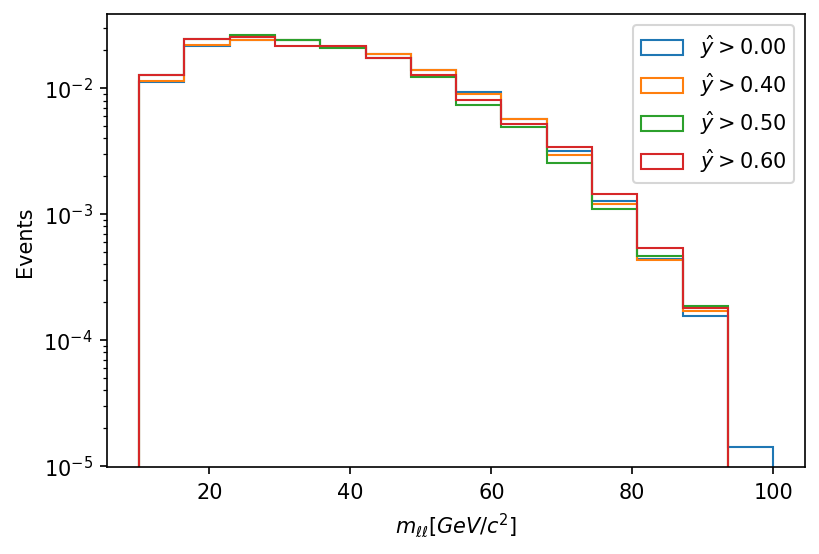

In [ ]:
axis = np.linspace (10,100,   15 )
for threshold in [0,0.4,0.5, 0.6]:
  plt.hist(signal[['mll']].values[y_nn[isSignal] > threshold], bins = axis, label = '$\hat y > %.2f$' % threshold, histtype='step', density=True )

plt.xlabel ("$m_{\ell\ell} [GeV/c^{2}]$")
plt.ylabel ("Events")
plt.yscale ("log")
plt.legend()
plt.show()

# Exercise 4.2

Train a neural network on two variables only and try to visualize the selection boundaries superposed to the 2d scatter plot as we did for the linear methods and for the BDT.

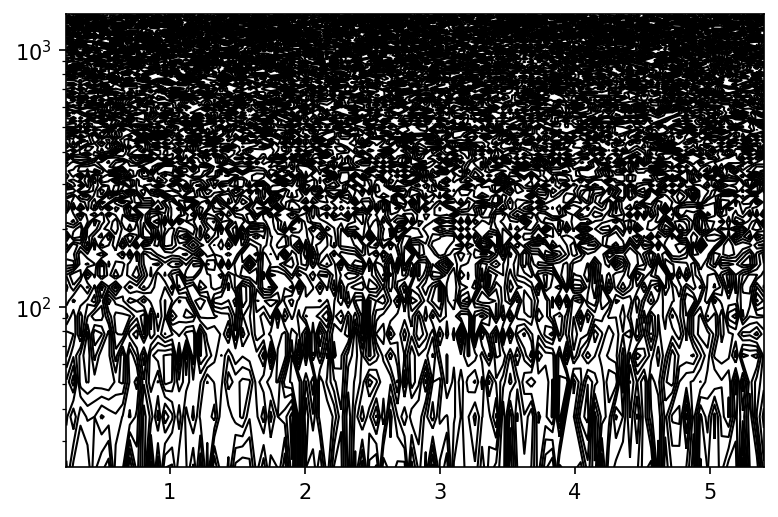

In [ ]:
## 1. Import the Sequential model and the Dense layer from keras 

## 2. Build your model and compile it 

## 3. Obtain the variables drll and mTi from the training set and train the 
##    model 

## 4. Go back to Ex. 2 and copy here the make_2d_plot function to create
##    a colorful scatter plot with signal and background contributions 

## 5. Call the function make_2d_plot that you just defined to create the
##    scatter plot 

## 6. Create the x and y axis for the two variables 
x_ = np.linspace (dataset['drll'].min(), dataset['drll'].max(), 100)
y_ = np.linspace (dataset['mTi'].min(), dataset['mTi'].max(), 100)

## and convert them to a set of point to test the prediction in 
X = np.dstack ( np.meshgrid ( x_, y_ ) )

## Compute the prediction in any X 
predictions = np.random.uniform (0,1, 100*100) ## REPLACE WITH YOUR PREDICTION

plt.contour (x_, y_, predictions.reshape ((100,100)), colors = 'black', linewidths=1 )
plt.yscale ('log')


### Exercise 4.3

Construct and ensable method using *super-simple* neural networks and see how the performance evolve with the number of weak learners included in the average.

> **Hint**. Keep neural network small, for example one single hidden layer with 8 neurons is enough.

In [ ]:
## 1. Import what you need 
## 2. Get the data you need for training from the dataset

## 3. Choose the number of models you want to include in the ensemble 
nModels = 50

## 4. Define an empty list of models 
models = []

## 5. Create a loop from 1 to nModels, and for each iteration:
for iModel in range (nModels):
##    - create and compile a new model (keep it simple!)
  model = Sequential ([
          Dense ( 8, activation = 'tanh' ), 
          Dense ( 1, activation = 'sigmoid'  )
   ])

  model.compile(optimizer='adam', loss='binary_crossentropy')

##    - fit the model 
##    - append the model to the list 
  models.append (model)


## Then compute the prediction on the test dataset for each model 
## >> Hint: Copy and adapt from Ex. 3 cell 8

## And compute the relative Area under the curve 
# score = [roc_auc_score(y_test, np.mean (all_predictions[:i+1], axis = 0)) for i in range(nModels)]

#plt.plot (score)
#plt.xlabel ("Number of averaged neural networks")
#plt.ylabel ("Area under the ROC")
#plt.show()

### Exercise 4.4 - Unsupervised learning 

A very common system of neural networks is the so-called **autoencoder**. 
An autoencoder is composed of a encoder and of a decoder tipically modeled by 
two neural networks. Say $N_1$ and $N_2$.

Autoencoders trained with an RMS loss to ensure that $N_2 ( N_1 (\mathbf x ) ) = \mathbf x$.
This forces the neural networks to compress as much as possible of the information in the dataset to be able to reproduce it through the decoder. 
The compressed information can be used as a non-physical variable encoding most of the information of the multivariate problem. It is a kind of projection towards a curvilinear axis (manifold) that preserve the information needed to regenerate the sample with all of its variables guessed with reasonable approximation.

Note that if you define a 1D manifold (hence the encoder has 1 neuron in the output layer) then you get a single variable representing the whole information content of the multivariate dataset. This single variable can then be used to try separating signal and variable. 
Note however that **this is not a test-statistic** because there is no guarantee that it will pushes signal and background towards opposite directions! 

Since to train the autoencoder you do not need the labels (or the categories) to which each entry belongs to, this is an example of **unsupervised learning**.

> Try implementing a simple autoencoder on the higgs dataset, try using both one and two variable encoding and represent this "encoded latent space" in a histogram (1D) and in a scatter plot (2D).
